Created by william from lexueoude.com. 更多正版技术视频讲解，公众号 1.乐学偶得（lexueoude）2.乐学FinTech (LoveShareFinTech)

升贴水是什么？
升水（Premium）
贴水（Discount）

1.S_0 +(-) f = F
2.{S_0 +(-) f}/S_0

In [2]:
spot_rate = input("Please enter the spot rate:")
# 市场上会提供一系列的bid-ask spread(pips)
#  spot 1.234/1.345
#  30-day -1.2/ -1.1(forward discount)
#  60-day -10.2/ -10.1(forward discount)
#  90-day -20.2/ -20.1(forward discount)
forward_rate = input("Please enter the forward quotes:")

all_in_FR = float(spot_rate) + float(forward_rate)/10000

print(all_in_FR)

1.23388


MTM（Mark to Market）市场价


F_0 :0时刻签订了一份3个月到期的远期合约
F_T ：T=3 ，三个月到期这一天的远期合约价格

F_T = S_T


思考模型：反向对冲合约


$$ V_T = (FP_T-FP_0)(contract\;size)$$


假设你是一家国际对冲基金经理，你在0时刻签订了一份合约：
short CHF 200 m against USD 0.9832(USD/CHF),90天后交割
60天的时候，我们BOSS需要对你现在持有的这份合约进行估值。

60天当天市场的报价：
USD/CHF
spot 0.9817/0.9821
30-day -7.6/-6.9
60-day -16.3/-12.1
90-day -25.4/21.2

60天当天的利率市场报价：

30-day  USD： 0.20%  CHF： 0.91%
60-day  USD： 0.21%  CHF： 0.92%
90-day  USD： 0.23%  CHF： 0.93%


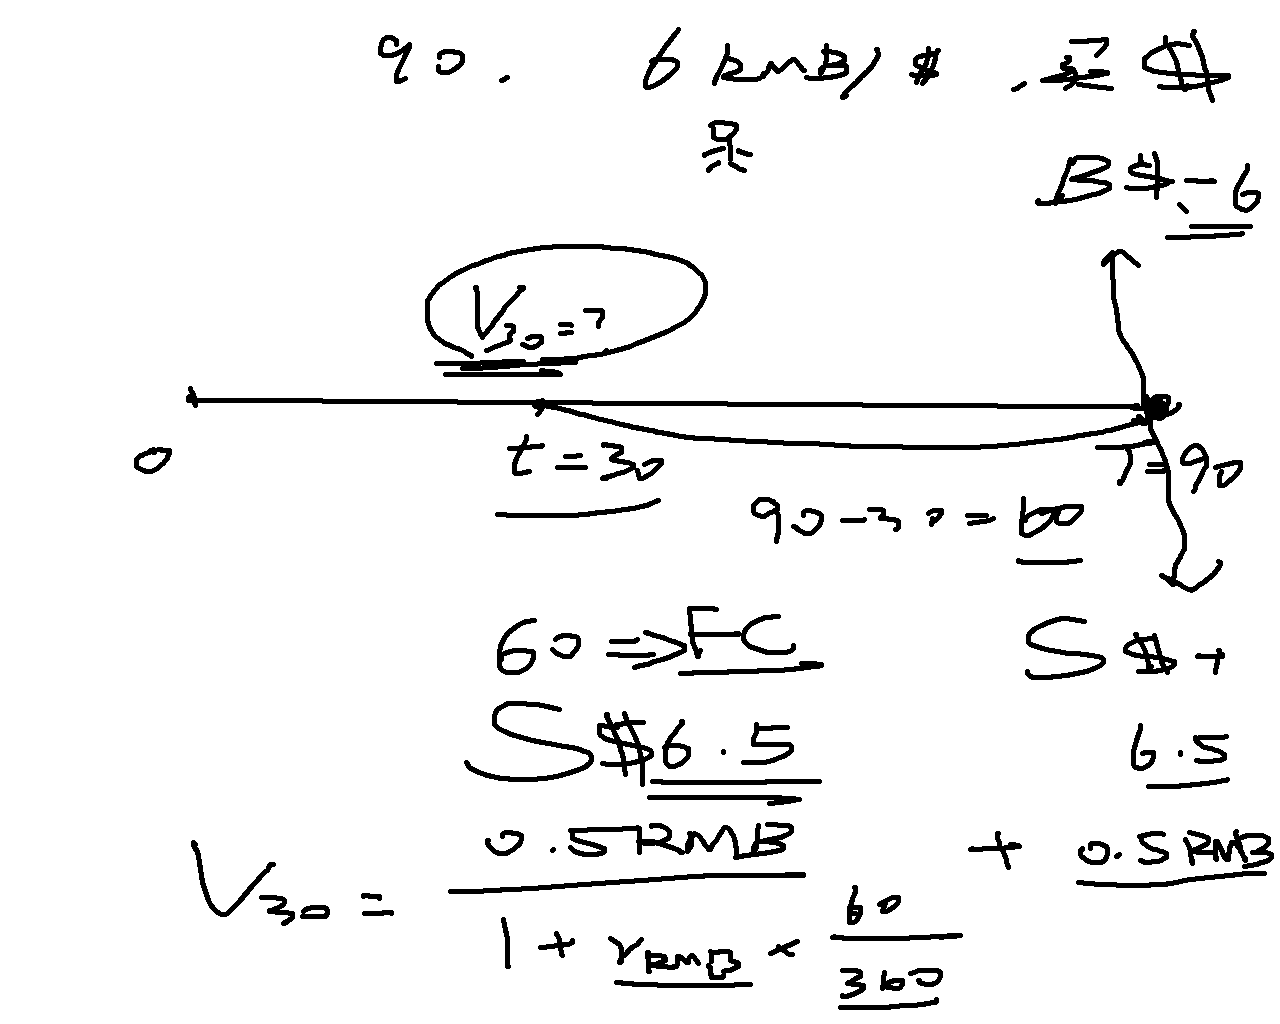

In [1]:
from IPython.display import Image
Image(filename='3.汇率与远期汇率相关套利.png')

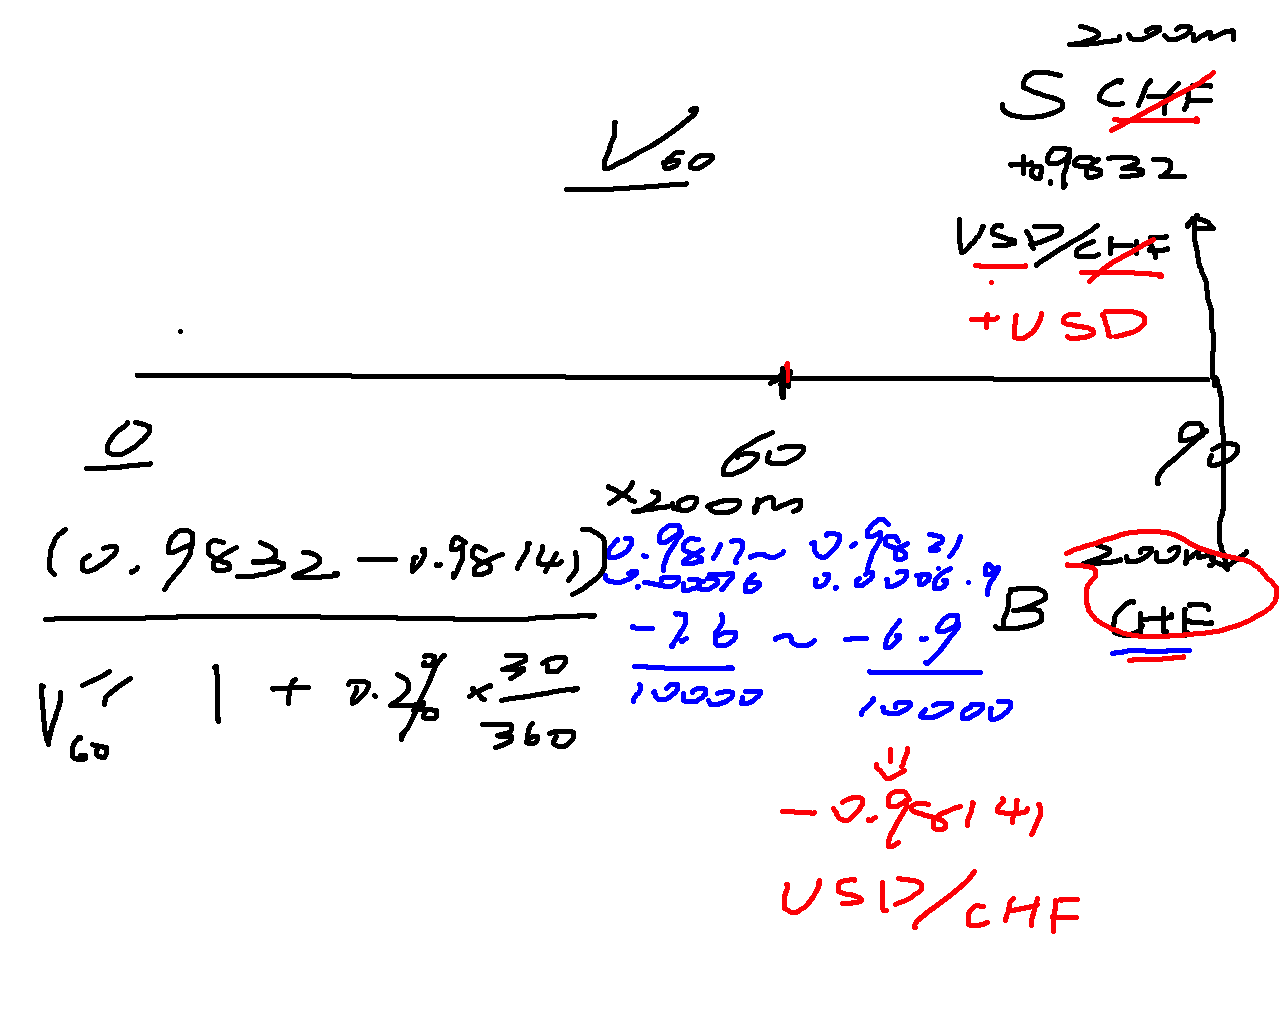

In [2]:
from IPython.display import Image
Image(filename='3.汇率与远期汇率相关套利2.png')

另一种思考汇率问题的方式：注意我们的"基准货币"的写法
看到市场上报价，很可能是以：CHF/USD

但是在建模与计算中，我们可以将"基准货币"写在分母（与通常的外汇汇率报盘相反！这里要注意确定谁是基准货币）
USD/CHF，这种方法的好处是不用考虑单位问题，直接进行计算（乘以或者除以汇率）后，直接消掉一个货币单位，最终剩下的货币单位就是你经过汇率转换后的单位。
————乐学偶得William提示。

$$ V_T = \frac{(FP_t - FP)(contract\;size)}{(1+ R(\frac{days}{360}))}$$





In [5]:
contract_size = float(input("请输入在0时刻签订的合约数目（million）："))
init_forward_rate = float(input("请输入最初签订的远期合同汇率："))
t_spot_rate = input("请输入在t时刻市场的即期汇率（spot）：")
t_forward_rate = input("请输入在t时刻市场的远期合同汇率（T-t）：")
t_all_in_FR = float(t_spot_rate) + float(t_forward_rate)/10000
t_interest_rate = float(input("请输入在t时刻市场的远期利率（T-t）："))
days_remained = float(input("请输入该远期合约存续天数"))


FC_Value = (contract_size * (init_forward_rate - t_all_in_FR))/(1+t_interest_rate*(days_remained/360))

print(FC_Value)

0.3579403432761123


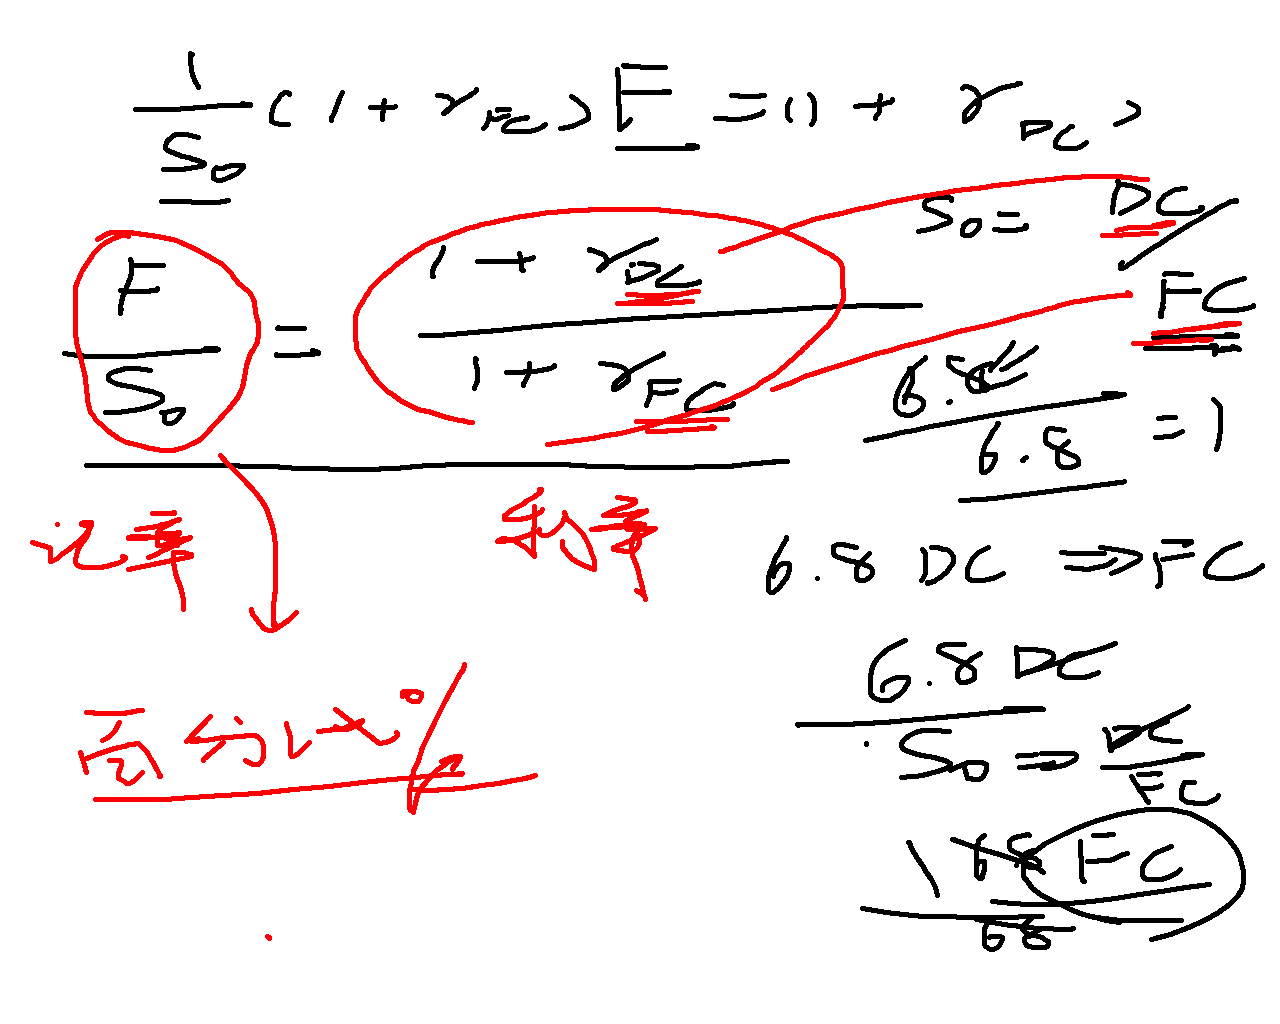

In [1]:
from IPython.display import Image
Image(filename='4.跨国套利理论与计算.png')

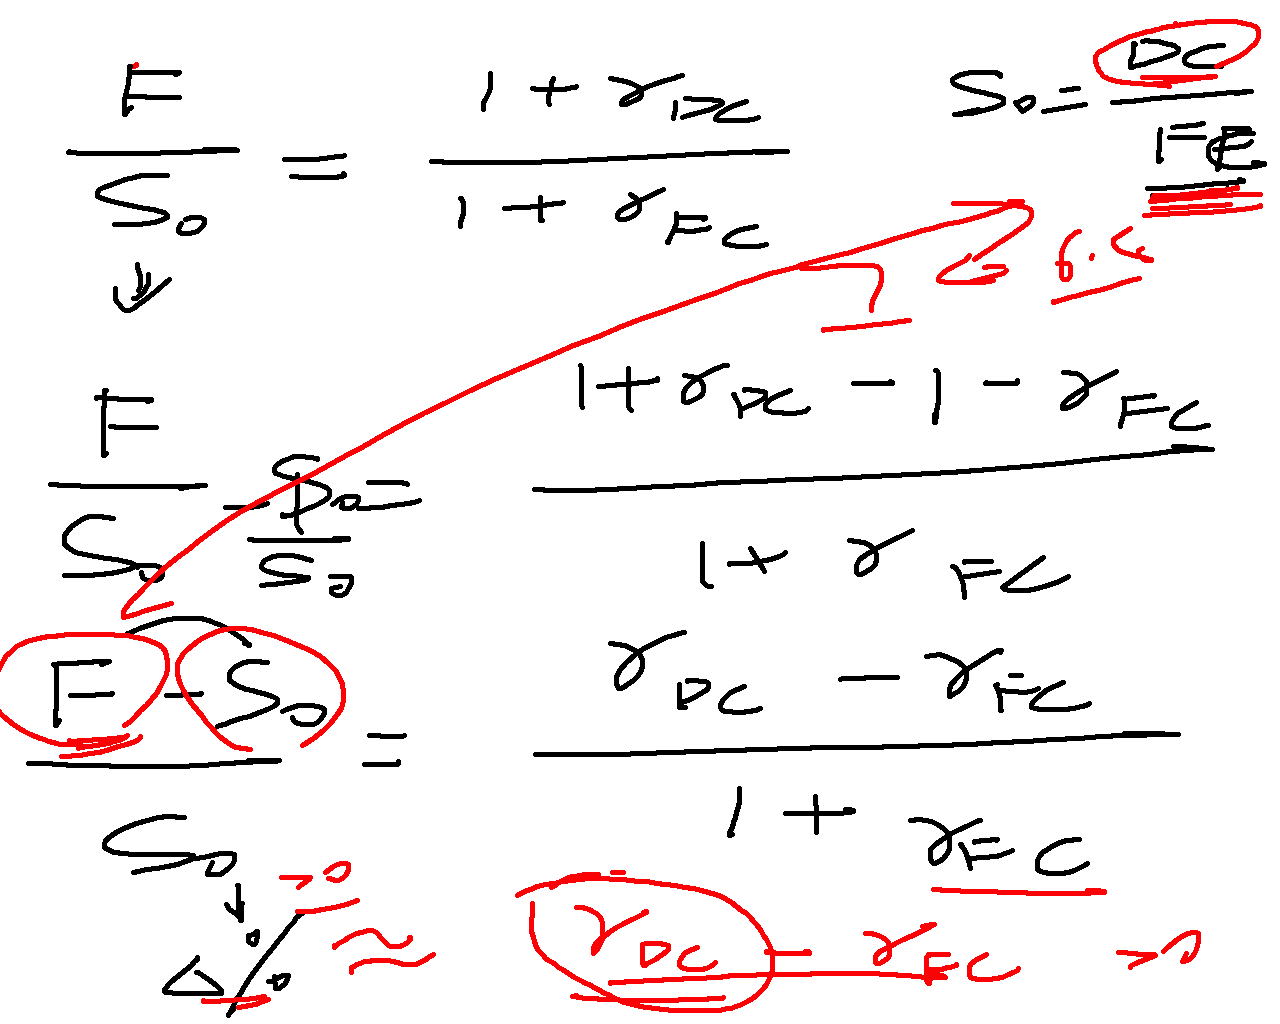

In [2]:
from IPython.display import Image
Image(filename='4.跨国套利理论与计算2.png')


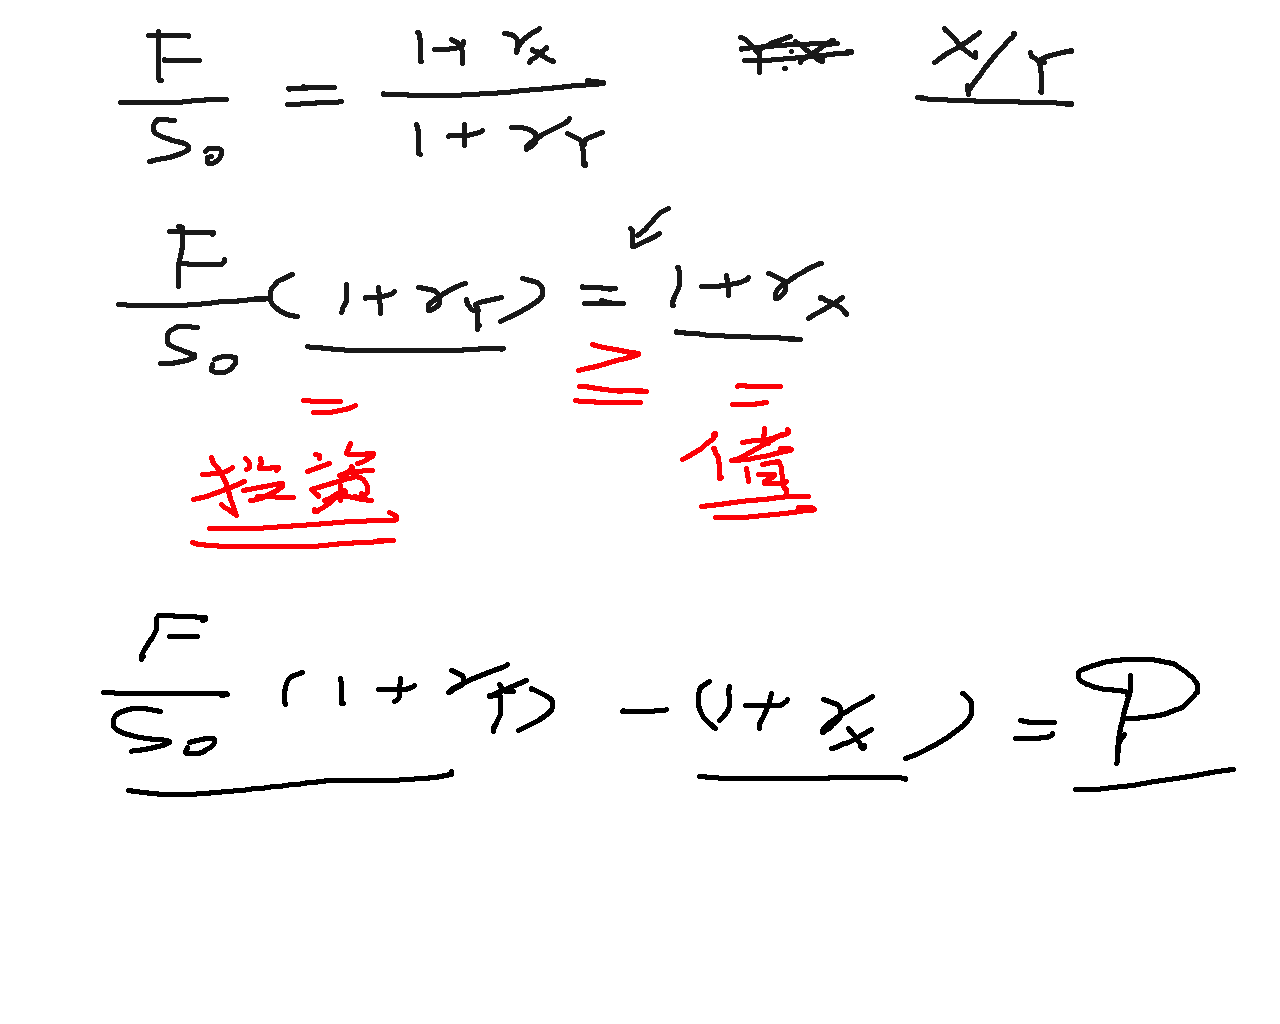

In [3]:
from IPython.display import Image
Image(filename='4.跨国套利理论与计算3.png')


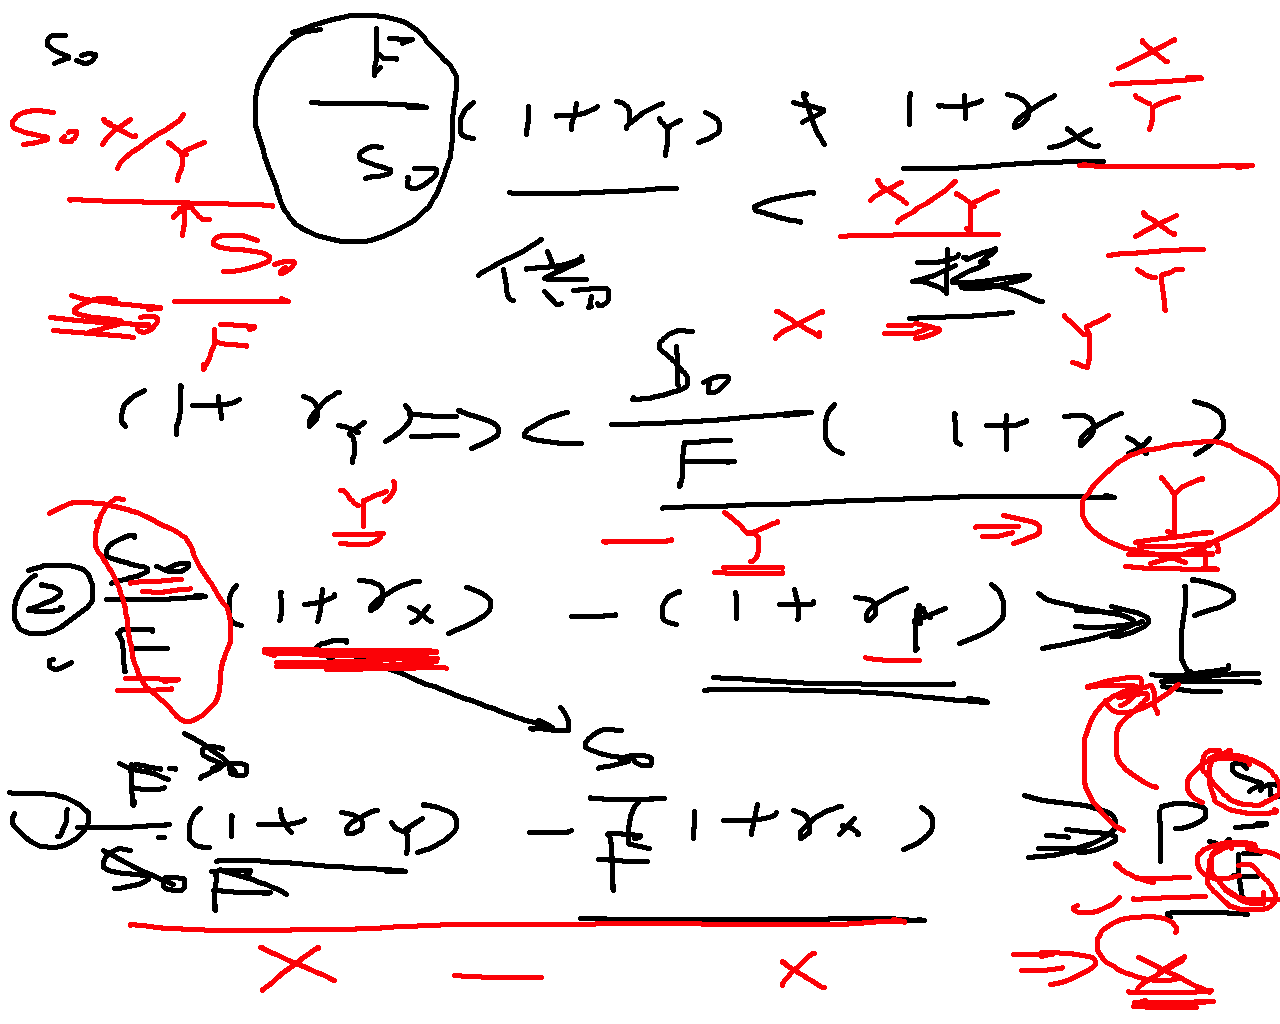

In [5]:
from IPython.display import Image
Image(filename='4.跨国套利理论与计算4.png')


假设美金的利率 8 %  ， 欧元的利率为 6 % ，目前的汇率是：
$ 1.30 per euro (USD/Euro) ,假设你现在看到的一年的远期合约汇率价格为 $ 1.35 per euro (USD/Euro)，判断是否有套利机会？

思路：先做判断，再做计算

In [7]:
def calculate_IRP(F,S,r_Euro,r_USD):
    if (F/S)*(1+r_Euro) > (1 +r_USD):
        V = (F/S)*(1+r_Euro) - (1 +r_USD)
        print("可以套利，方法为：在美国借钱，在欧洲投资，最终赚取的是美金")
        print(V)
    else:
        V = (S/F)*(1+r_USD) - (1 +r_Euro)
        print("可以套利，方法为：在欧洲借钱，在美国投资，最终赚取的是欧元")
        print(V)
calculate_IRP(1.35,1.30,0.06,0.08)

可以套利，方法为：在美国借钱，在欧洲投资，最终赚取的是美金
0.020769230769230873
